# GWO hourly meteorological data plotting and processing
**Author: Jun Sasaki  Coded on January 10, 2019  Revised on January 11, 2019**


In [1]:
from mod_class_met import *

In [2]:
datetime_ini = "1990-1-1 00:00:00"
datetime_end = "1992-12-1 00:00:00"
stn = "Chiba"
dir =  "../GWO/Hourly/"
met = Met_GWO(datetime_ini=datetime_ini, datetime_end=datetime_end, stn=stn, dir=dir)

Initial datetime =  1990-01-01 00:00:00
End datetime =  1992-12-01 00:00:00
Data directory =  ../GWO/Hourly/Chiba/
../GWO/Hourly/Chiba/Chiba1989.csv
../GWO/Hourly/Chiba/Chiba1990.csv
../GWO/Hourly/Chiba/Chiba1991.csv
../GWO/Hourly/Chiba/Chiba1992.csv
../GWO/Hourly/Chiba/Chiba1993.csv


In [3]:
met.df.head()

KanID Kname  KanID_1    lhpa  lhpaRMK    shpa  shpaRMK  \
1990-01-01 00:00:00    682    千葉      682     NaN        2     NaN        2   
1990-01-01 01:00:00    682    千葉      682     NaN        2     NaN        2   
1990-01-01 02:00:00    682    千葉      682     NaN        2     NaN        2   
1990-01-01 03:00:00    682    千葉      682  1011.6        8  1014.0        8   
1990-01-01 04:00:00    682    千葉      682  1011.8        8  1014.2        8   

                         kion  kionRMK      stem  ...      humd  humdRMK  \
1990-01-01 00:00:00  4.400000        8       NaN  ...       NaN        2   
1990-01-01 01:00:00  3.666667        8       NaN  ...       NaN        2   
1990-01-01 02:00:00  2.933333        8       NaN  ...       NaN        2   
1990-01-01 03:00:00  2.200000        8  3.900000  ... -5.900000        8   
1990-01-01 04:00:00  1.800000        8  4.033333  ... -5.533333        8   

                     lght  lghtRMK  slht  slhtRMK  kous  kousRMK         u  \
1990-01-01 00:00:00   NaN        0   NaN        0   NaN        0  3.040559   
1990-01-01 01:00:00   NaN        0   NaN        0   NaN        0  2.588308   
1990-01-01 02:00:00   NaN        0   NaN        0   NaN        0  2.136058   
1990-01-01 03:00:00   NaN        0   NaN        0   NaN        0  1.683807   
1990-01-01 04:00:00   NaN        0   NaN        0   NaN        0  0.721844   

                            v  
1990-01-01 00:00:00 -3.040559  
1990-01-01 01:00:00 -3.382063  
1990-01-01 02:00:00 -3.723566  
1990-01-01 03:00:00 -4.065070  
1990-01-01 04:00:00 -3.110740  

[5 rows x 31 columns]

In [4]:
met.df.columns

Index(['KanID', 'Kname', 'KanID_1', 'lhpa', 'lhpaRMK', 'shpa', 'shpaRMK',
       'kion', 'kionRMK', 'stem', 'stemRMK', 'rhum', 'rhumRMK', 'muki',
       'mukiRMK', 'sped', 'spedRMK', 'clod', 'clodRMK', 'tnki', 'tnkiRMK',
       'humd', 'humdRMK', 'lght', 'lghtRMK', 'slht', 'slhtRMK', 'kous',
       'kousRMK', 'u', 'v'],
      dtype='object')

In [6]:
met.df['kion'].head()

1990-01-01 00:00:00    4.400000
1990-01-01 01:00:00    3.666667
1990-01-01 02:00:00    2.933333
1990-01-01 03:00:00    2.200000
1990-01-01 04:00:00    1.800000
Freq: H, Name: kion, dtype: float64

# Plotting example using Matplotlib

In [7]:
data = Data1D(df=met.df, col_1='kion')

In [8]:
data.v1

array([ 4.4       ,  3.66666667,  2.93333333, ..., 11.1       ,
       10.8       , 10.7       ])

#### FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Example of scalar 1-D time series plot

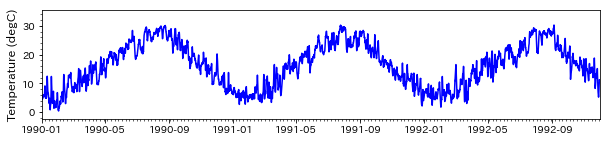

In [11]:
### xlim = (parse("2014-01-15"), parse("2014-02-16"))  ### ex. for datetime
ylabel='Temperature (degC)'
xlim = None
#xlim = (parse("1990-09-02"), parse("1992-09-03"))
dx = 7
ylim = None
dy = 2

try:
    plot_config = Data1D_PlotConfig(xlim = xlim, ylim = ylim, x_minor_locator = DayLocator(interval=dx), \
                                    y_minor_locator = MultipleLocator(dy), format_xdata = DateFormatter('%Y-%m-%d'), ylabel = ylabel)
    Plot1D(plot_config, data, window=25, center=True).save_plot('data.png', dpi=600)
except:
    print('dx and/or dy may be too small and too many tickes.')

## Example of time series vector plot

In [12]:
wind = Data1D(met.df, 'u', 'v')
print(wind.v[0:10])

[4.3        4.2588366  4.29274845 4.4        3.19339402 2.16973855
 1.7        1.82726268 2.92213773 4.3       ]


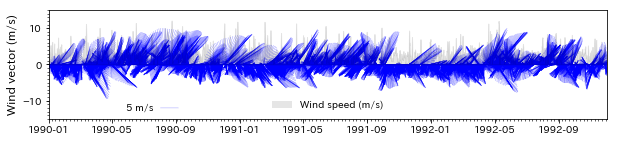

In [14]:
#xlim = (parse("2013-12-25 00:00:00"),parse("2014-01-10 00:00:00"))
vlabel = 'Wind speed (m/s)'
ylabel = 'Wind vector (m/s)'
png_vector = "hourly_wind.png"
xlim = None
#xlim = (parse("1990-09-02"), parse("1990-09-03"))
dx = 7
#ylim = None
ylim = (-15, 15)
dy = 1
try:
    plot_config = Data1D_PlotConfig(xlim = xlim, ylim = ylim, x_minor_locator = DayLocator(interval=dx), \
                                    y_minor_locator = MultipleLocator(dy), format_xdata = DateFormatter('%Y-%m-%d'), \
                                    ylabel=ylabel, vlabel=vlabel, vlabel_loc = 'lower center')
    Plot1D(plot_config, wind, window=25, center=True).save_vector_plot(png_vector, magnitude = True, dpi=600)
except:
    print('dx and/or dy may be too small and too many ticks')

# Plotting exmaples using hvPlot

In [15]:
import hvplot.pandas

In [16]:
data.df[['kion', 'sped']].hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [17]:
def hook(plot, element):
    plot.handles['xaxis'].axis_label_text_font_style = 'normal'
    plot.handles['yaxis'].axis_label_text_font_style = 'normal'
    

### hvPlotのオプション指定方法
- 基本的にはhvplotの引数でHoloviewsのオプションの多くが指定できる
- `hooks`は関数`hook(plot, element)`を定義し，hvPlotで`.opts(hooks=[hook])`として指定する．未確認だが，hvPlotやHoloviewsの引数としては定義されていないBokehのオプションを含め，すべてのオプションが指定できそう

In [18]:
data.df['kion'].hvplot(xlim=(pd.datetime(1991,1,2), pd.datetime(1991,3,4)), xticks=10, \
                       ylabel='Temperature (degC)', ylim=(-4,35), yticks=10,\
                       width=600, height=200, line_color='red', line_width=0.5, \
                       fontsize={'xticks':12,'yticks':12 ,'ylabel':14},\
                       title='').opts(hooks=[hook])

:Curve   [index]   (kion)